<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/family_violence_analysis%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
install.packages(c("ggplot2","gridExtra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [141]:
library(ggplot2)
require(gridExtra)

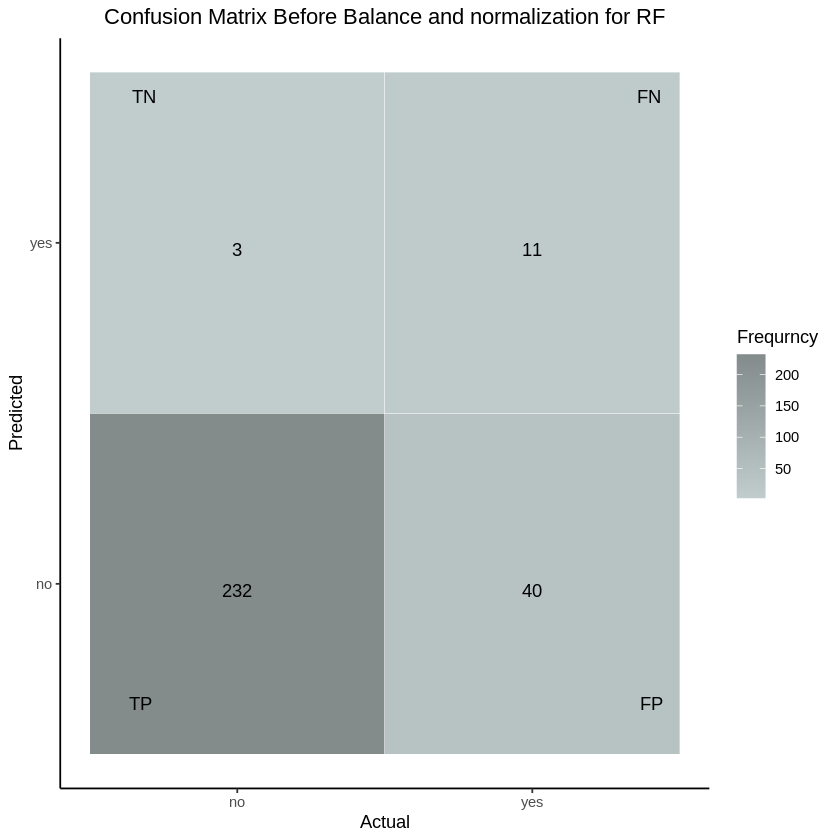

In [247]:
Actual <- factor(c("no", "no", "yes", "yes"))
Predicted <- factor(c("no","yes","no","yes"))
Y <- c(232,3,40,11)
df2 <- data.frame(Actual,Predicted,Frequrncy=Y)
annotations2 <- data.frame(
  xpos = c(-Inf, -Inf, Inf, Inf), ypos =  c(-Inf, Inf, -Inf, Inf),
  annotateText = c("TP", "TN", "FP", "FN"),
  hjustvar = c(-3, -3, 3, 3),
  vjustvar = c(-6, 5, -6, 5))
p2 <- ggplot(data = df2, mapping = aes(x = Actual, y = Predicted)) +
  geom_tile(aes(fill =Frequrncy), colour = "white") +
  geom_text(aes(label = sprintf("%1.0f", Frequrncy)), vjust = 1) +
  scale_fill_gradient(low = "azure3", high = "azure4") +
  theme_bw()+ ggtitle("Confusion Matrix Before Balance and normalization for RF") + theme_classic()+
theme(plot.title = element_text(hjust = 0.5))
p2<- p2+geom_text(data = annotations2, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText))
p2

In [ ]:
df

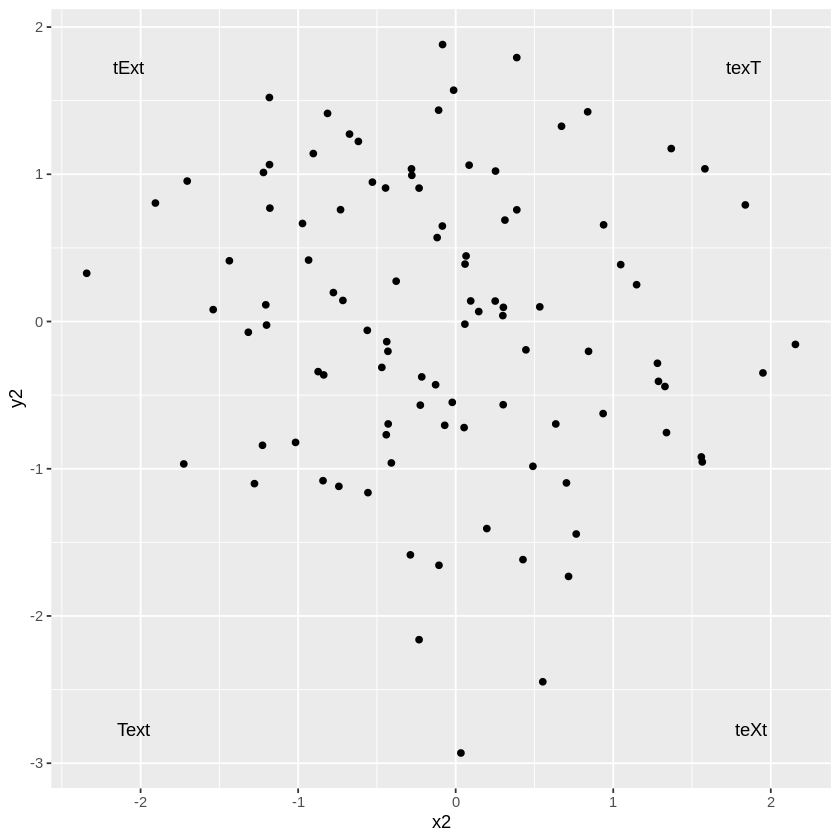

In [160]:
##Example 2
annotations2 <- data.frame(
  xpos = c(-Inf, -Inf, Inf, Inf), ypos =  c(-Inf, Inf, -Inf, Inf),
  annotateText = c("Text", "tExt", "teXt", "texT"),
  hjustvar = c(-2, -2, 3, 3),
  vjustvar = c(-4, 5, -4, 5))

df2 <- data.frame(x2 = rnorm(100), y2 = rnorm(100))

ggplot(df2, aes(x2, y2)) + geom_point() +
  geom_text(data = annotations2, aes(x = xpos, y = ypos, hjust = hjustvar, vjust = vjustvar, label = annotateText))

In [148]:
ggplot(d) +
  geom_text_npc(aes(npcx = x.chr, npcy = y.chr, label = lab))

ERROR: ignored

In [78]:
# load the library
library(randomForest)
library(caret)
require(caTools)
library(e1071)
library(raster)
library(class)
library(pROC)
library(smotefamily)
library(mlbench)
library(ROSE)
library(klaR)

Loading required package: MASS


Attaching package: ‘MASS’


The following objects are masked from ‘package:raster’:

    area, select




In [ ]:
set.seed(1234)

data <- read.csv("/content/sample_data/fd.csv",header=T)
data <- data[-c(1,2,18)]
data1 <- read.csv("/content/sample_data/fvd.csv",header = T)
#preproc2 <- preProcess(data[,c(1:15)], method=c("range"))
#n.data <- predict(preproc2, data[,c(1:15)])
#n.data$Family_Violence <- data$Family_Violence
head(data)
attach(data)

In [108]:
dim(data)

[1] 511  15

In [ ]:
head(data)

In [110]:
df <- data.frame(data1[c(2,9)],data[1:15])
df <- df[-8]
head(df)

,age,Fm,Gender,Marital_Status,Education,Occupation,Family_Type,Earning_Person,Head_of_Family,Religion,Residence_Location,Wealth.Index,Income_Before_Corona,Income_After_Corona,Lost_Job,Family_Violence
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,2,1,0,1,1,1,1,1,1,1,1,6,2,1,No
2,1,1,1,0,3,1,2,1,1,1,1,1,3,1,2,Yes
3,1,2,1,0,2,1,1,4,1,1,2,1,3,3,2,No
4,1,1,1,0,1,1,1,1,1,1,1,1,3,2,1,Yes
5,1,2,1,0,2,1,2,2,1,1,1,1,3,2,1,Yes
6,1,2,1,0,2,1,1,1,1,1,1,1,1,1,1,Yes


In [114]:
df$Family_Violence <- factor(df$Family_Violence)
df$age  <- factor(df$age)
df$Gender  <- factor(df$Gender)
df$Marital_Status   <- factor(df$Marital_Status )
df$Education   <- factor(df$Education )
df$Occupation   <- factor(df$Occupation)
df$Family_Type  <- factor(df$Family_Type)
df$Fm  <- factor(df$Fm)
df$Earning_Person  <- factor(df$Earning_Person)
df$Head_of_Family  <- factor(df$Head_of_Family)
df$Religion   <- factor(df$Religion )
df$Residence_Location  <- factor(df$Residence_Location)
df$Wealth.Index  <- factor(df$Wealth.Index)
df$Income_Before_Corona  <- factor(df$Income_Before_Corona)
df$Income_After_Corona  <- factor(df$Income_After_Corona)
df$Lost_Job   <- factor(df$Lost_Job )

In [ ]:
attach(df)

In [137]:
chisq.test(table(Lost_Job ,Family_Violence),correct=FALSE)


	Pearson's Chi-squared test

data:  table(Lost_Job, Family_Violence)
X-squared = 18.359, df = 1, p-value = 1.829e-05


In [ ]:
table(pirates$eyepatch, 
      pirates$college)

In [98]:
split = sample.split(Family_Violence, SplitRatio=0.80)
train = subset(df, split==TRUE)
test = subset(df,split==FALSE)
ctrl <- trainControl(method = "repeatedcv", number = 10, repeats =10,sampling="up")

In [99]:
names(df)

[1] "age"                  "Fm"                   "Gender"              
 [4] "Marital_Status"       "Education"            "Occupation"          
 [7] "Family_Type"          "Earning_Person"       "Head_of_Family"      
[10] "Religion"             "Residence_Location"   "Wealth.Index"        
[13] "Income_Before_Corona" "Income_After_Corona"  "Lost_Job"            
[16] "Family_Violence"

In [ ]:
# Logistics Regression
glm.fit <- glm(Family_Violence~., data = df, family = binomial)
summary(glm.fit)

In [103]:
fit.glm <-train(Family_Violence~., data=train, method="glm", trControl=ctrl,preProcess = c("range"))
pred3 <- predict(fit.glm,test)
h3 <- data.frame(pred3 ,test=test$Family_Violence)
t3 <- table(h3)
confusionMatrix(t3,positive='Yes')

Confusion Matrix and Statistics

     test
pred3 No Yes
  No  22  11
  Yes 34  35
                                          
               Accuracy : 0.5588          
                 95% CI : (0.4571, 0.6571)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.46169         
                                          
                  Kappa : 0.1472          
                                          
 Mcnemar's Test P-Value : 0.00104         
                                          
            Sensitivity : 0.7609          
            Specificity : 0.3929          
         Pos Pred Value : 0.5072          
         Neg Pred Value : 0.6667          
             Prevalence : 0.4510          
         Detection Rate : 0.3431          
   Detection Prevalence : 0.6765          
      Balanced Accuracy : 0.5769          
                                          
       'Positive' Class : Yes             
                                          

In [ ]:
table(train$Family_Violence)


 No Yes 
226 183 

In [73]:
fit.rf <- train(Family_Violence~., data=train, method="rf", trControl=ctrl,preProcess = c("range"))
pred1 <- predict(fit.rf,test)
h1 <- data.frame(pred1 ,test=test$Family_Violence)
t1 <- table(h1)
confusionMatrix(t1,positive='Yes')

Confusion Matrix and Statistics

     test
pred1 No Yes
  No  28   9
  Yes 28  37
                                          
               Accuracy : 0.6373          
                 95% CI : (0.5361, 0.7302)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.044543        
                                          
                  Kappa : 0.2935          
                                          
 Mcnemar's Test P-Value : 0.003085        
                                          
            Sensitivity : 0.8043          
            Specificity : 0.5000          
         Pos Pred Value : 0.5692          
         Neg Pred Value : 0.7568          
             Prevalence : 0.4510          
         Detection Rate : 0.3627          
   Detection Prevalence : 0.6373          
      Balanced Accuracy : 0.6522          
                                          
       'Positive' Class : Yes             
                                          

In [80]:
fit.nb <- train(Family_Violence~., data=train, method="nb", trControl=ctrl,preProcess = c("scale", "center"))
pred6 <- predict(fit.nb,test)
h6 <- data.frame(pred6 ,test=test$Family_Violence)
t6 <- table(h6)
confusionMatrix(t6,positive='Yes')

Streaming output truncated to the last 5000 lines.
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 33”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 36”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 37”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 38”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 39”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 40”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 41”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 29”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probabili

Confusion Matrix and Statistics

     test
pred6 No Yes
  No  22   9
  Yes 34  37
                                          
               Accuracy : 0.5784          
                 95% CI : (0.4766, 0.6756)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.3104081       
                                          
                  Kappa : 0.1881          
                                          
 Mcnemar's Test P-Value : 0.0002522       
                                          
            Sensitivity : 0.8043          
            Specificity : 0.3929          
         Pos Pred Value : 0.5211          
         Neg Pred Value : 0.7097          
             Prevalence : 0.4510          
         Detection Rate : 0.3627          
   Detection Prevalence : 0.6961          
      Balanced Accuracy : 0.5986          
                                          
       'Positive' Class : Yes             
                                          


common   rare 
   100     50 

Confusion Matrix and Statistics

     test
pred3 No Yes
  No  24   9
  Yes 32  37
                                          
               Accuracy : 0.598           
                 95% CI : (0.4963, 0.6939)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.1854883       
                                          
                  Kappa : 0.223           
                                          
 Mcnemar's Test P-Value : 0.0005908       
                                          
            Sensitivity : 0.8043          
            Specificity : 0.4286          
         Pos Pred Value : 0.5362          
         Neg Pred Value : 0.7273          
             Prevalence : 0.4510          
         Detection Rate : 0.3627          
   Detection Prevalence : 0.6765          
      Balanced Accuracy : 0.6165          
                                          
       'Positive' Class : Yes             
                                          

ERROR: ignored

Confusion Matrix and Statistics

     test
pred1 No Yes
  No  21   7
  Yes 35  39
                                          
               Accuracy : 0.5882          
                 95% CI : (0.4864, 0.6848)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.2437          
                                          
                  Kappa : 0.2113          
                                          
 Mcnemar's Test P-Value : 3.097e-05       
                                          
            Sensitivity : 0.8478          
            Specificity : 0.3750          
         Pos Pred Value : 0.5270          
         Neg Pred Value : 0.7500          
             Prevalence : 0.4510          
         Detection Rate : 0.3824          
   Detection Prevalence : 0.7255          
      Balanced Accuracy : 0.6114          
                                          
       'Positive' Class : Yes             
                                          

Setting levels: control = No, case = Yes

Setting direction: controls < cases



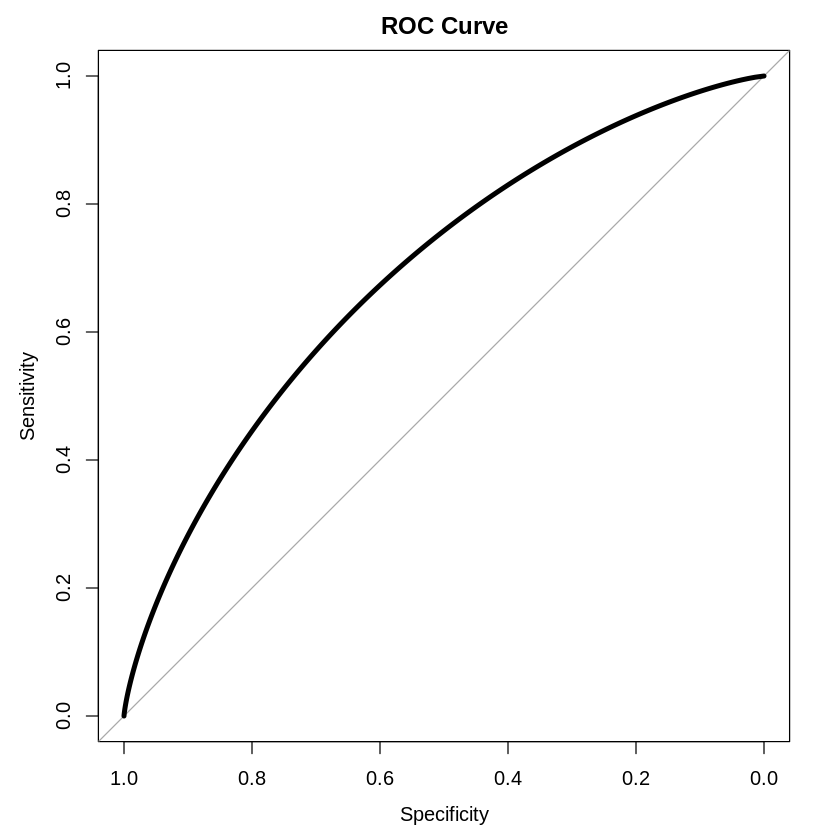

In [ ]:
data(mtcars)
mtcars
attach(mtcars)

In [254]:
model <- lm(mpg~.,data=mtcars)
model
summary(model)


Call:
lm(formula = mpg ~ ., data = mtcars)

Coefficients:
(Intercept)          cyl         disp           hp         drat           wt  
   12.30337     -0.11144      0.01334     -0.02148      0.78711     -3.71530  
       qsec           vs           am         gear         carb  
    0.82104      0.31776      2.52023      0.65541     -0.19942  



Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4506 -1.6044 -0.1196  1.2193  4.6271 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 12.30337   18.71788   0.657   0.5181  
cyl         -0.11144    1.04502  -0.107   0.9161  
disp         0.01334    0.01786   0.747   0.4635  
hp          -0.02148    0.02177  -0.987   0.3350  
drat         0.78711    1.63537   0.481   0.6353  
wt          -3.71530    1.89441  -1.961   0.0633 .
qsec         0.82104    0.73084   1.123   0.2739  
vs           0.31776    2.10451   0.151   0.8814  
am           2.52023    2.05665   1.225   0.2340  
gear         0.65541    1.49326   0.439   0.6652  
carb        -0.19942    0.82875  -0.241   0.8122  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 21 degrees of freedom
Multiple R-squared:  0.869,	Adjusted R-squared:  0.8066 
F-statistic: 13.93 on 10 and 21 DF,  p-value: 3.793e-07